In [1]:
%matplotlib inline
import openpathsampling as paths
import numpy as np
import matplotlib.pyplot as plt
import os
import openpathsampling.visualize as ops_vis
from IPython.display import SVG

In [2]:
# note that this log will overwrite the log from the previous notebook
import logging.config
#logging.config.fileConfig("../resources/logging.conf", disable_existing_loggers=False)
logging.config.fileConfig("timed_logging.conf", disable_existing_loggers=False)

# Analyzing the fixed path length simulation

We start with the same sorts of analysis as we did in the flexible path length example: we get an overview of the file, then we look at the acceptance ratio, and then we look at the move history tree and the decorrelated trajectories.

In [3]:
%%time
fixed = paths.Storage("tps_nc_files/alanine_dipeptide_fixed_tps.nc", 'r')

CPU times: user 40.4 s, sys: 6.01 s, total: 46.5 s
Wall time: 13min 3s


In [4]:
engine = fixed.engines[0]
fixed_scheme = fixed.schemes[0]

print "File size: {0} for {1} steps, {2} snapshots".format(
    fixed.file_size_str,
    len(fixed.steps),
    len(fixed.snapshots)
)

File size: 75.05GB for 10001 steps, 3988906 snapshots


In [5]:
# rough estimate of total time
#sum(step.change.details.timing for step in fixed.steps[1:])

In [6]:
fixed_scheme.move_summary(fixed.steps)

shooting ran 100.000% (expected 100.00%) of the cycles with acceptance 5004/10000 (50.04%)


17


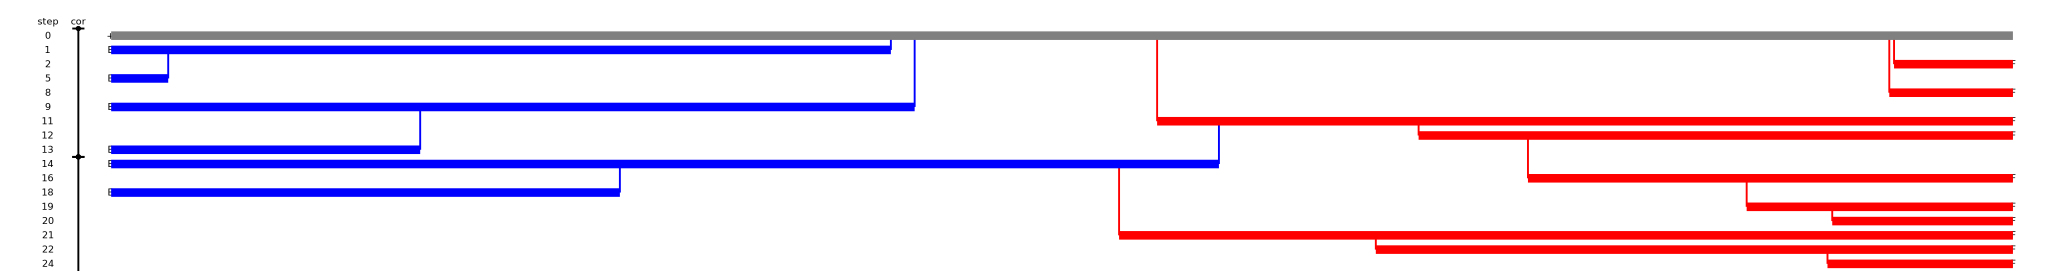

In [7]:
history = ops_vis.PathTree(
    fixed.steps[0:25],
    ops_vis.ReplicaEvolution(
        replica=0
    )
)
print len(list(history.samples))

SVG(history.svg())

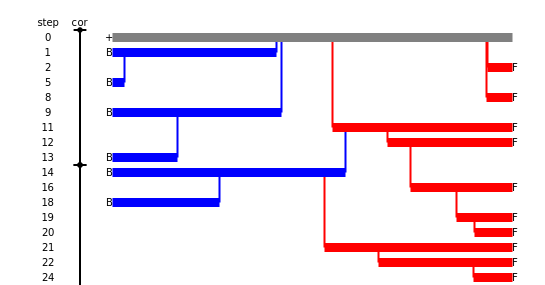

In [8]:
history.options.css['scale_x'] = 1
SVG(history.svg())

In [9]:
with open("fixed_tps_tree.svg", 'w') as svg_out:
    svg_out.write(history.svg())

In [10]:
print "Decorrelated trajectories:", len(history.generator.decorrelated_trajectories)

Decorrelated trajectories: 2


In [11]:
full_history = ops_vis.PathTree(
    fixed.steps,
    ops_vis.ReplicaEvolution(
        replica=0
    )
)

n_decorrelated = len(full_history.generator.decorrelated_trajectories)

print "All decorrelated trajectories:", n_decorrelated

All decorrelated trajectoriesL: 409


Note that the number of MC steps (and even more so, time steps) per decorrelated trajectory is much higher than in the case of flexible path length TPS. This is the heart of the argument that flexible path length approaches are more efficient than fixed path length approaches: with a fixed path length, it takes much more effort to get a decorrelated trajectory.